#  Multicollinearity
conllinearity refers to statistical phenomenon in which two or more predictor variables are closely related to one another

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Condition Number

In [42]:
# linearly related array
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T
print("array",arr)
print()
print("=========================================")
print("condition number==>",np.linalg.cond(np.dot(arr.T,arr)))
print(np.linalg.inv(np.dot(arr.T,arr)))
print("------------------------------------------")

# a small change in input there is big change in inv
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T
print(np.linalg.inv(np.dot(arr.T,arr)))
print("=========================================")

array [[ 1.   1.   1.2]
 [ 1.   2.   2.1]
 [ 1.   3.   3.1]
 [ 1.   4.   4.1]
 [ 1.   5.   5. ]
 [ 1.   6.   6. ]
 [ 1.   7.   7. ]
 [ 1.   8.   8. ]
 [ 1.   9.   9.1]
 [ 1.  10.  10.2]]

condition number==> 29104.19736328427
[[  0.67713004   1.89686099  -1.97309417]
 [  1.89686099  18.3309417  -18.40807175]
 [ -1.97309417 -18.40807175  18.49775785]]
------------------------------------------
[[  0.579715     1.55493605  -1.62140011]
 [  1.55493605  24.45470752 -24.42659041]
 [ -1.62140011 -24.42659041  24.41073715]]


In [44]:
# non linear data
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[2.4, 0.7, 4.3, 3.5, 1.6, 5.1, 6.9, 7.5, 8.1, 9.8]]).T
print("=========================================")
print("condition number==>",np.linalg.cond(np.dot(arr.T,arr)))
print(np.linalg.inv(np.dot(arr.T,arr)))
print("------------------------------------------")
# changing input variables 
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[4, 0.7, 4.8, 3.5, 1.6, 5.1, 6.9, 7.5, 8.1, 9.8]]).T
print(np.linalg.inv(np.dot(arr.T,arr)))z
print("=========================================")

condition number==> 341.0403652956386
[[ 0.46684896 -0.06359872 -0.00341803]
 [-0.06359872  0.06375331 -0.05752395]
 [-0.00341803 -0.05752395  0.06408812]]
------------------------------------------
[[ 0.49599863 -0.03845293 -0.03548221]
 [-0.03845293  0.03925935 -0.03412952]
 [-0.03548221 -0.03412952  0.04292203]]


### 2. Correlation

In [51]:
df = pd.read_csv("advertising.csv")
df = df.reset_index().rename(columns= {"index": "constant"})
df.head()

,constant,TV,Radio,Newspaper,Sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,12.0
3,3,151.5,41.3,58.5,16.5
4,4,180.8,10.8,58.4,17.9


<Axes: >

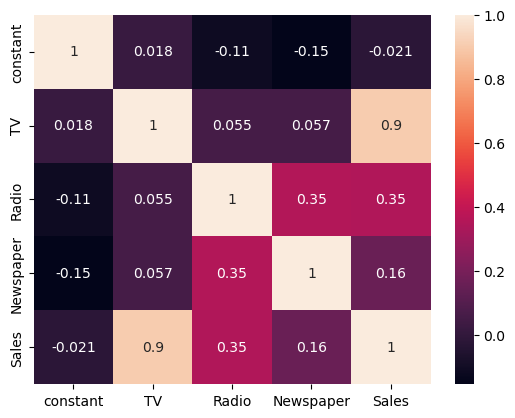

In [54]:
sns.heatmap(df.corr(),annot=True)

### 3. VIF (Variance Inflation Factor)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []

for i in range(3):
    vif.append(variance_inflation_factor(df.iloc[:,1:4],i))
    
df_vif = pd.DataFrame({"vif": vif},index = df.iloc[:,1:4].columns).T
df_vif

,TV,Radio,Newspaper
vif,2.486772,3.285462,3.055245


In [79]:
from sklearn.datasets import make_regression
import statsmodels.api as sm

# data with multicollinearity
np.random.seed(42)
x,y = make_regression(n_samples=100,n_features=3,noise=.5,random_state=42)

x[:,1] = x[:,0] + 0.5 * np.random.normal(size=100) # multicollinearity between 0 and 1 column

data = pd.DataFrame(x,columns=["x1","x2","x3"])
data["y"] = y

data.corr()

,x1,x2,x3,y
x1,1.000000,0.882948,-0.048636,0.148108
x2,0.882948,1.000000,-0.054696,0.165352
x3,-0.048636,-0.054696,1.000000,0.071536
y,0.148108,0.165352,0.071536,1.000000


In [80]:
# adding constant terms
data_with_constant_full = sm.add_constant(data[["x1","x2","x3"]])
data_with_constant_reduced = sm.add_constant(data[["x1","x3"]])

# fitting linear model
full_lin_model = sm.OLS(data["y"],data_with_constant_full).fit()
reduced_lin_model = sm.OLS(data["y"],data_with_constant_reduced).fit()

print("Regression summary for the model with all the predictors")
print(full_lin_model.summary())
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(" ")
print("Regression summary for the model with the predictors(x1,x3)")
print(reduced_lin_model.summary())

Regression summary for the model with all the predictors
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.122
Date:                Thu, 12 Oct 2023   Prob (F-statistic):              0.344
Time:                        13:49:55   Log-Likelihood:                -581.96
No. Observations:                 100   AIC:                             1172.
Df Residuals:                      96   BIC:                             1182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [83]:
#  
data_x1_x2_combined = (data["x1"] + data["x2"])/2
data_x1_x2_combined= sm.add_constant(data_x1_x2_combined)

x1_x2_model = sm.OLS(data["y"],data_x1_x2_combined).fit()
print(x1_x2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.648
Date:                Thu, 12 Oct 2023   Prob (F-statistic):              0.107
Time:                        14:29:52   Log-Likelihood:                -582.35
No. Observations:                 100   AIC:                             1169.
Df Residuals:                      98   BIC:                             1174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9784      8.289      0.480      0.6

### Partial Least Square

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

In [88]:
# split the datasets
x_train,x_test,y_train,y_test = train_test_split(data[["x1","x2","x2"]],data['y'],test_size=.2,random_state=42)

# create PLS model and fit 
pls_model = PLSRegression(n_components=2)
pls_model.fit(x_train,y_train)

y_pred = pls_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error of PLS model:", mse)

Mean squared error of PLS model: 7451.899720807346
